In [2]:
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


## MSE , Gradient , gradient_function

In [3]:
df = pd.read_csv('Housing.csv')
#print(df)
def MSE(X_train, y_train, W, b ,lambda_ = 0.001) :
    m,n = X_train.shape
    total_cost = 0
    for i in range(m):
        f_wb = np.dot(X_train[i],W) + b
        total_cost += (f_wb - y_train[i])**2
    total_cost /=2*m
    total_cost += (lambda_ / (2 * m)) * np.sum(W**2)
    return total_cost

def gradient(X_train,y_train,W,b,lambda_=0.001):
    m,n = X_train.shape
    dj_dW = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        f_wb = np.dot(X_train[i],W) + b
        err = (f_wb - y_train[i])
        for j in range(n):
            dj_dW[j] += err*X_train[i,j]
    dj_dW /= m  
    dj_db /= m
    for j in range(n): 
       dj_dW[j] += (lambda_/m)*W[j] 
        
    return dj_dW,dj_db

def gradient_descent(X_train,y_train,initial_W,initial_b,gradient,MSE,
                    learning_rate,numbers_iteration):
    J_history = []
    W = initial_W
    b = initial_b
    m,n = X_train.shape
    for i in range(numbers_iteration):
        dj_dW,dj_db = gradient(X_train,y_train,W,b)
        W = W - learning_rate*dj_dW
        b = b - learning_rate*dj_db

        if i < 100000:
            J_history.append(MSE(X_train,y_train,W,b))
        if i%math.ceil(numbers_iteration/10) == 0:
            print(f"Iteration {i:4d} : Cost {J_history[-1]:8.2f}")
    return W,b,J_history

In [4]:
def f_wb(X, W, b):
    return np.dot(X, W) + b

### FEATURE SCALING and HOT-ENCODING and Z-Score Normalization

In [5]:
continuous_col = ['bedrooms','bathrooms','stories']

for col in continuous_col:
    mean = df[col].mean() 
    sigma = df[col].std()
    df[col] = (df[col] - mean) / sigma

In [6]:
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes':1,'no':0})


In [7]:
print(df.columns.tolist())
print(df[:10])
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)
df.to_csv('X_train_prepared.csv', index=False)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
      price   area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000   7420  1.402131   1.420507  1.376952         1          0   
1  12250000   8960  1.402131   5.400847  2.529700         1          0   
2  12250000   9960  0.047235   1.420507  0.224204         1          0   
3  12215000   7500  1.402131   1.420507  0.224204         1          0   
4  11410000   7420  1.402131  -0.569663  0.224204         1          1   
5  10850000   7500  0.047235   3.410677 -0.928544         1          0   
6  10150000   8580  1.402131   3.410677  2.529700         1          0   
7  10150000  16200  2.757028   3.410677  0.224204         1          0   
8   9870000   8100  1.402131  -0.569663  0.224204         1          1   
9   9800000   5750  0.047235   1.420507  2.529700         1          1   

   basement  

In [8]:
df.to_csv('X_train_prepared.csv',index=False)
sqrt_feature = np.sqrt(df.iloc[:, 0].clip(lower=0))
scaler = StandardScaler()
sqrt_feature_scaled = scaler.fit_transform(sqrt_feature.values.reshape(-1, 1)).flatten()
data = np.array(df, dtype=float)
X_processed = data[:,1:]
X_processed[:,0] = sqrt_feature_scaled
y_train = data[:,0]
m, n = X_processed.shape

print(X_processed[1])

[3.33064143 1.40213123 5.4008469  2.52969969 1.         0.
 0.         0.         1.         3.         0.         0.
 0.        ]


In [9]:
def plot_J_costFunction(J_history):
    fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
    ax1.plot(J_history)
    ax2.plot(100 + np.arange(len(J_history[100:])),J_history[100:])
    ax1.set_title("Cost vs iteration ")
    ax2.set_title("Cost vs iteration (tail) ")
    ax1.set_ylabel("Cost") ; ax1.set_xlabel("iteration step")
    ax2.set_ylabel("Cost") ; ax2.set_xlabel("iteration step")

Iteration    0 : Cost 13051842871458.65
Iteration  500 : Cost 2585851673936.02
Iteration 1000 : Cost 1426239682167.35
Iteration 1500 : Cost 1185379631177.78
Iteration 2000 : Cost 1080893991752.76
Iteration 2500 : Cost 1017652293793.98
Iteration 3000 : Cost 975333999770.40
Iteration 3500 : Cost 945745629214.96
Iteration 4000 : Cost 924371090635.67
Iteration 4500 : Cost 908465998100.78
896324290973.662


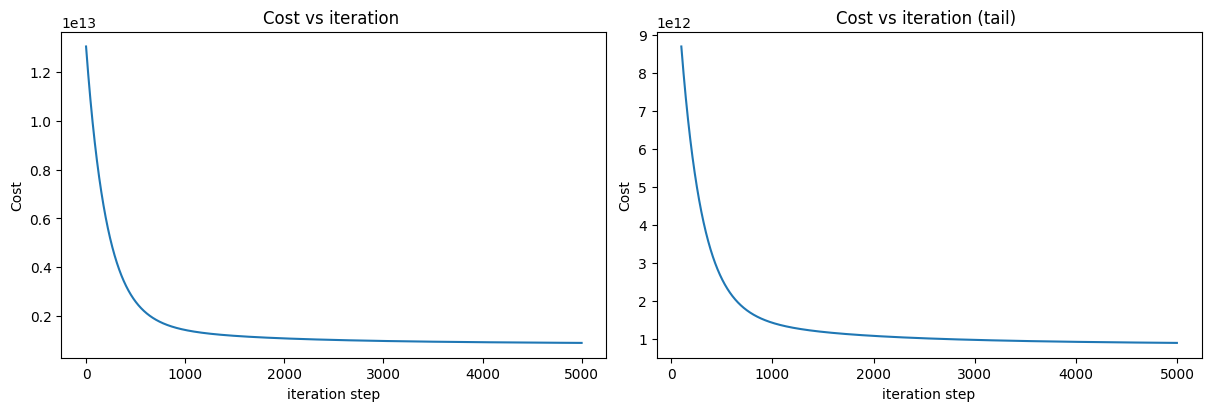

In [10]:
b_init = 0
iterations = 5000
learning_rate = 0.001
W_init = np.zeros(n)       

W, b,J_history = gradient_descent(X_processed, y_train, W_init, b_init, gradient,MSE,learning_rate, iterations)

plot_J_costFunction(J_history)

print(MSE(X_processed,y_train,W,b))


In [11]:
def plot_linear_regression(X_processed,y_train,f_wb,W,b):
    m = X_processed.shape[0]
    yp = np.zeros(m)
    for i in range(m):
        yp[i] = np.dot(X_norm[i],W) + b
    fig,ax = plt.subplots(6,)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_set(X, y, W, b, feature_names=None, f_wb=None,ax=None):
    dlc = {"dlorange": "#FF8800"}  # orange
    dlblue = "#0000FF"             # bleu

    m, n = X.shape
    yp = np.dot(X, W) + b 

    ncols = 2
    nrows = (n + 1) // ncols

    fig, ax = plt.subplots(nrows, ncols, figsize=(12, nrows * 3))
    fig.suptitle("Analyse des prédictions de prix des maisons", fontsize=20, y=0.95)

    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(n)]

    for i in range(n):
        row, col = divmod(i, ncols)
        axis = ax[row, col]

        axis.scatter(X[:, i], y, marker='o', c='b', label="Valeurs réelles")
        axis.scatter(X[:, i], yp, color=dlc["dlorange"], label="Prédiction")
        axis.set_xlabel(feature_names[i])
        axis.set_ylabel("Prix")

        axis.legend()

    if n % 2 != 0:
        ax[-1, -1].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()


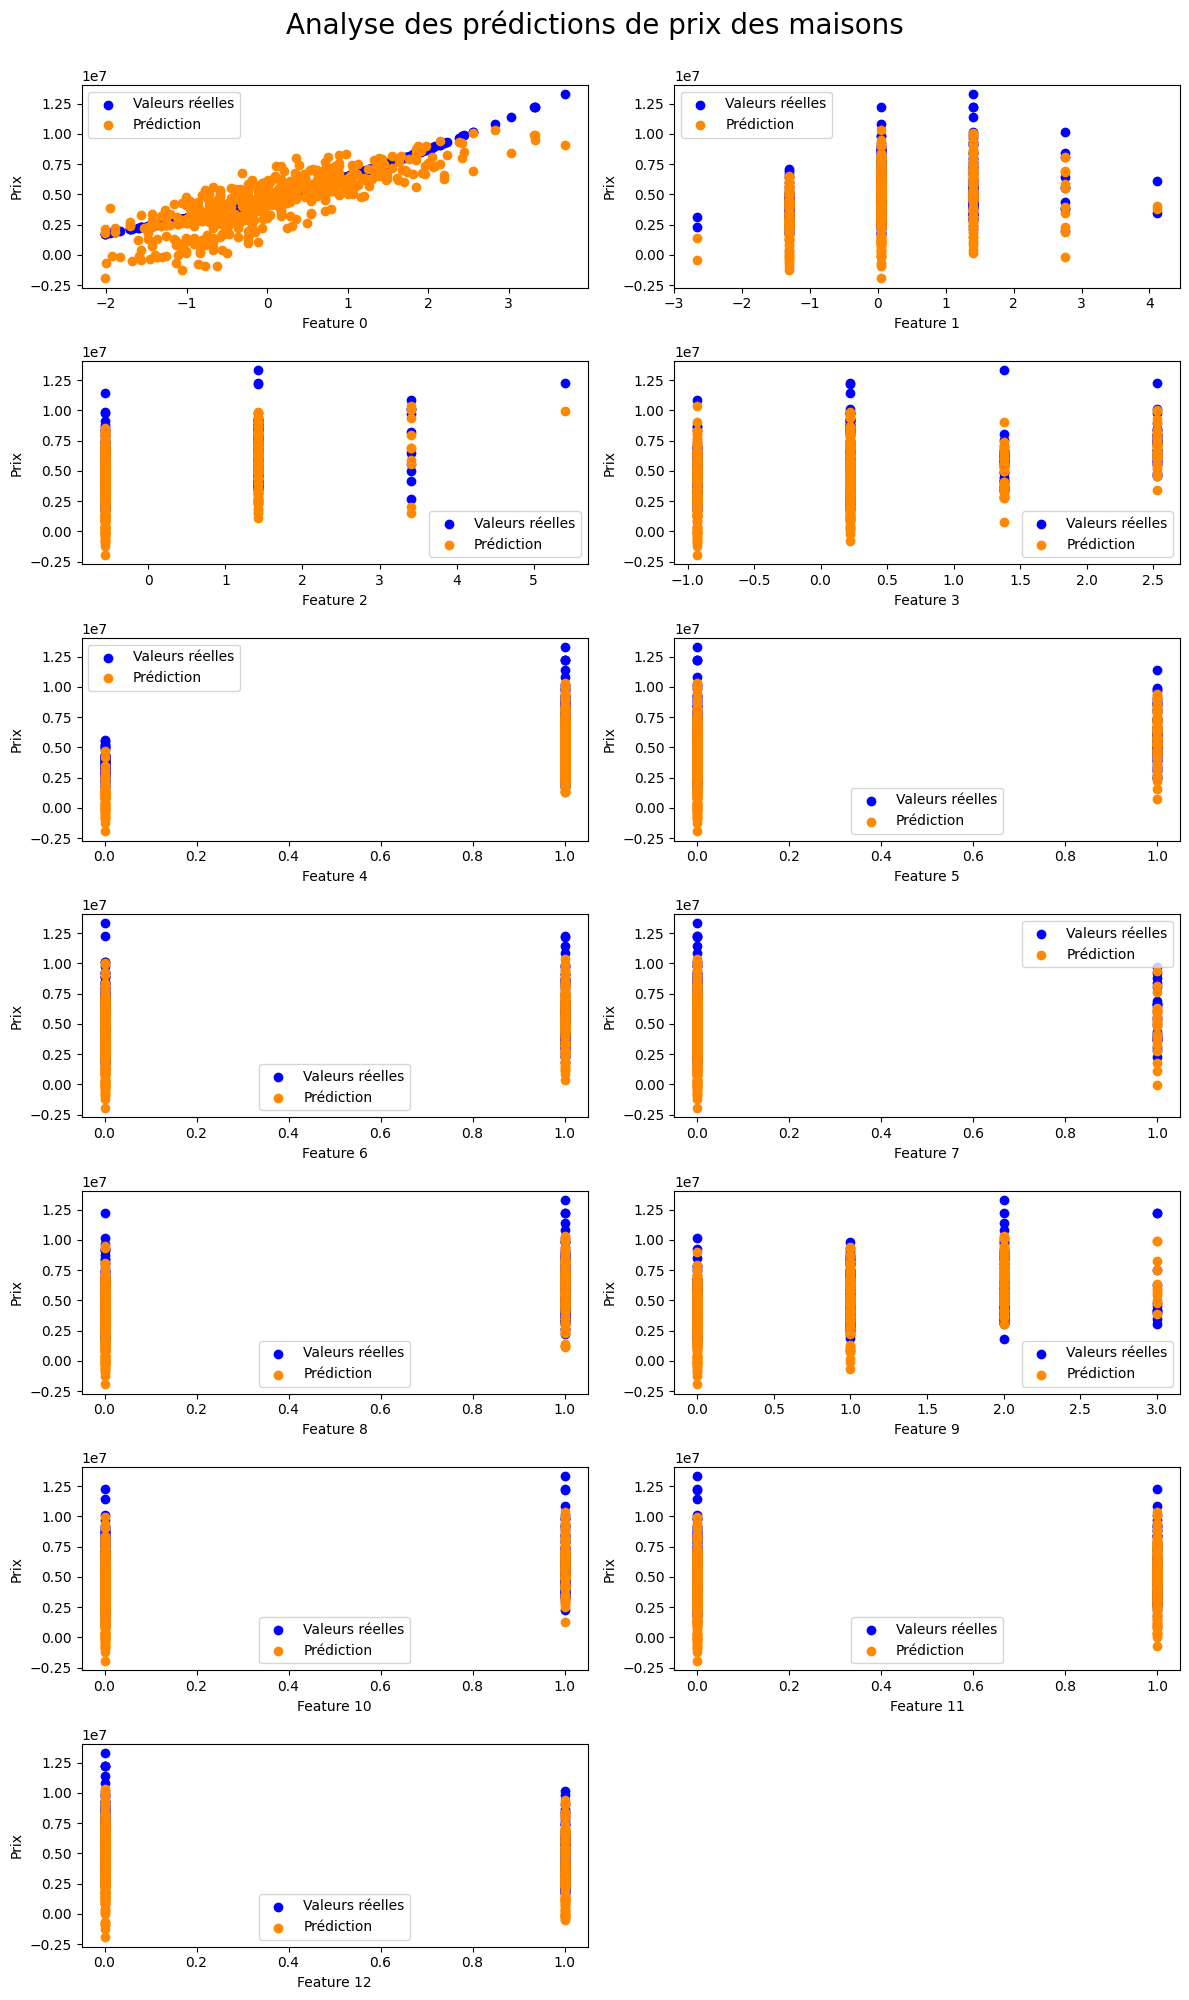

In [13]:
plot_training_set(X_processed,y_train,W,b,f_wb=None,ax=None)

Text(0.5, 1.0, 'Prédictions vs Réel')

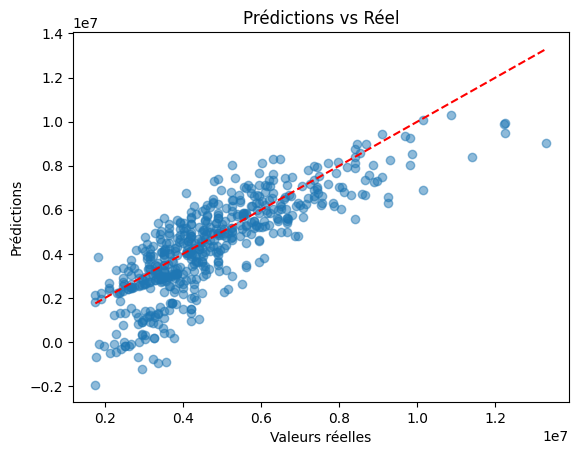

In [14]:
y_pred = X_processed[:,:] @ W + b
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Valeurs réelles")

plt.ylabel("Prédictions")
plt.title("Prédictions vs Réel")



In [53]:
for i in range(100) :
    print(f"f_wb = {np.dot(X_processed[i],W) + b} ==== y = {y_train[i]}")

f_wb = 8595200.440163188 ==== y = 13300000.0
f_wb = 10251229.82341678 ==== y = 12250000.0
f_wb = 8815210.728664711 ==== y = 12250000.0
f_wb = 10066965.852027914 ==== y = 12215000.0
f_wb = 8065330.355104424 ==== y = 11410000.0
f_wb = 9506989.653876241 ==== y = 10850000.0
f_wb = 9535244.023041103 ==== y = 10150000.0
f_wb = 5215442.840084451 ==== y = 10150000.0
f_wb = 8275472.0189673025 ==== y = 9870000.0
f_wb = 7841004.386287322 ==== y = 9800000.0
f_wb = 7703208.592622342 ==== y = 9800000.0
f_wb = 8849252.818330297 ==== y = 9681000.0
f_wb = 7131791.234218406 ==== y = 9310000.0
f_wb = 6244661.123063544 ==== y = 9240000.0
f_wb = 4980644.694216307 ==== y = 9240000.0
f_wb = 7229174.945859691 ==== y = 9100000.0
f_wb = 8040828.096205044 ==== y = 9100000.0
f_wb = 7205559.462284456 ==== y = 8960000.0
f_wb = 7079711.046229489 ==== y = 8890000.0
f_wb = 6876521.002833961 ==== y = 8855000.0
f_wb = 7119780.384180361 ==== y = 8750000.0
f_wb = 8192771.044029761 ==== y = 8680000.0
f_wb = 5810793.8424085